In [69]:
import pandas as pd
import numpy as np
import nltk
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\mwver\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [70]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

# Function to get scores from words
def get_word_sentiment(word):
    """Get sentiment score for a word."""
    pos_score = 0
    neg_score = 0
    synsets = wn.synsets(word)
    for synset in synsets:
        senti_synset = swn.senti_synset(synset.name())
        # Multiple by 5 to accentuate difference
        pos_score += senti_synset.pos_score()*5
        neg_score += senti_synset.neg_score()*5
    return pos_score, neg_score

def get_sentence_sentiment(sentence):
    if not isinstance(sentence, str):
        return (0.0, 0.0)  # Neutral sentiment scores
    pos_score = 0
    neg_score = 0
    words = sentence.split(" ")
    for word in words:
        word_pos_score, word_neg_score = get_word_sentiment(word)
        pos_score += word_pos_score
        neg_score += word_neg_score
    return pos_score, neg_score


In [71]:
# Example cases of functions
word = 'terrible'
pos_score, neg_score = get_word_sentiment(word)
print(f"Sentiment for word {word}: pos:{pos_score} neg:{neg_score}")

word = 'good'
pos_score, neg_score = get_word_sentiment(word)
print(f"Sentiment for word {word}: pos:{pos_score} neg:{neg_score}")

sentence = "food is extremely bad but place is beautiful"
pos_score, neg_score = get_sentence_sentiment(sentence)
print(f"Sentiment for sentence {sentence}: pos:{pos_score} neg:{neg_score}")

sentence = "food is very good and place is beautiful"
pos_score, neg_score = get_sentence_sentiment(sentence)
print(f"Sentiment for sentence {sentence}: pos:{pos_score} neg:{neg_score}")

Sentiment for word terrible: pos:0.625 neg:13.125
Sentiment for word good: pos:76.875 neg:0.625
Sentiment for sentence food is extremely bad but place is beautiful: pos:19.375 neg:58.75
Sentiment for sentence food is very good and place is beautiful: pos:98.125 neg:7.5


In [72]:
# Load dataset
file_path = r"C:\Users\mwver\Documents\Uni Projects\MENG\Advanced AI\Assignment 2\prepared_data.csv"
data = pd.read_csv(file_path)
data.head(5)

,Review,Sentiment
0,wow love place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stop late bank holiday rick steve recommendati...,1
4,selection menu great price,1


In [73]:
sentence = data["Review"][0]
pos_score, neg_score = get_sentence_sentiment(sentence)
print(f"Sentiment for sentence 1 with rating of positive: pos:{pos_score} neg:{neg_score}")

Sentiment for sentence 1 with rating of positive: pos:25.625 neg:4.375


In [74]:
# Convert floats to int
data["Sentiment"] = [int(i) for i in data["Sentiment"]]
data.head()

,Review,Sentiment
0,wow love place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stop late bank holiday rick steve recommendati...,1
4,selection menu great price,1


In [75]:
# Get average scores from each category to start making rules for fuzzy system
train_data = data[-850:]
test_data = data[:150] 

reviews_by_sentiment = {0: [], 1: []}

for index, row in train_data.iterrows():
    sentiment = row["Sentiment"]
    review = row["Review"]
    reviews_by_sentiment[sentiment].append(review)

for sentiment, reviews_list in reviews_by_sentiment.items():
    num_reviews = len(reviews_list)
    print(f"Sentiment {sentiment}: {num_reviews} reviews")

train_data["Sentiment"].value_counts()

Sentiment 0: 432 reviews
Sentiment 1: 418 reviews


Sentiment
0    432
1    418
Name: count, dtype: int64

In [76]:
data.dtypes

Review       object
Sentiment     int64
dtype: object

In [77]:
print(reviews_by_sentiment)

{0: ['wait minute vain', 'crostini come salad stale', 'unfortunately hit bakery leftover day order stale', 'come today relocate not impressed', 'avoid cost', 'nt look good food', 've never treat bad', 'order spinach avocado salad ingredient sad dress literally zero taste', 'caught night judging review m not inspire', 'service leaf lot desire', 'literally sat minute no ask order', 'burger absolutely no flavor meat totally bland burger overcook no charcoal flavor', 'decide not send waitress look like verge have heart attack', 'dress treat rudely', 'probably dirt', 'food suck expect suck imagine', 'order arrive gyro miss', 'm not sure joeys vote best hot dog valley reader phoenix magazine', 'live music friday totally blow', 've never insult felt disrespect', 'warm beer nt help', 've live time ve step foot place', 'bad experience', 'night place', 'bug never show give sure wall bug climb kitchen', 'minute wait salad realize nt come time soon', 'wo nt', 'soggy not good', 'small not worth pri

In [78]:
# Get average scores from each set including highest and lowest

zero_list = []
one_list = []

def obtain_metrics(list):
    sum_pos = 0
    sum_neg = 0

    for item in list:
        sum_pos += item[0] 
        sum_neg += item[1] 

    avg_pos = sum_pos/len(list)
    avg_neg = sum_neg/len(list)

    return avg_pos, avg_neg

for sentiment, reviews in reviews_by_sentiment.items():
    for review in reviews:
        score = get_sentence_sentiment(review)
        if sentiment == 0:
            zero_list.append(score)
        elif sentiment == 1:
            one_list.append(score)


print(len(zero_list))
print(len(one_list))

avg_pos, avg_neg = obtain_metrics(zero_list)
print(f"Average for Sentiment Score 0: (pos: {avg_pos}, neg {avg_neg})")
avg_pos, avg_neg = obtain_metrics(one_list)
print(f"Average for Sentiment Score 1: (pos: {avg_pos}, neg {avg_neg})")



432
418
Average for Sentiment Score 0: (pos: 17.137453703703706, neg 16.466423611111107)
Average for Sentiment Score 1: (pos: 29.984162679425836, neg 8.236531100478468)


In [79]:
# Get highest and lowest values for each list
zero_max = max(zero_list)
zero_min = min(zero_list)

one_max = max(one_list)
one_min = min(one_list)


print("Highest and lowest values for each list:")
print("zero_list:", "Highest:", zero_max, "Lowest:", zero_min)
print("one_list:", "Highest:", one_max, "Lowest:", one_min)

Highest and lowest values for each list:
zero_list: Highest: (141.18, 37.57) Lowest: (0.0, 0.0)
one_list: Highest: (233.75, 3.125) Lowest: (0.0, 0.0)


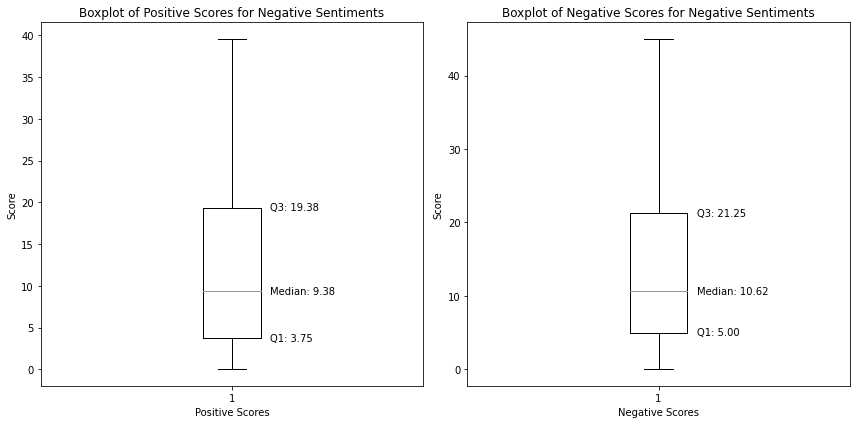

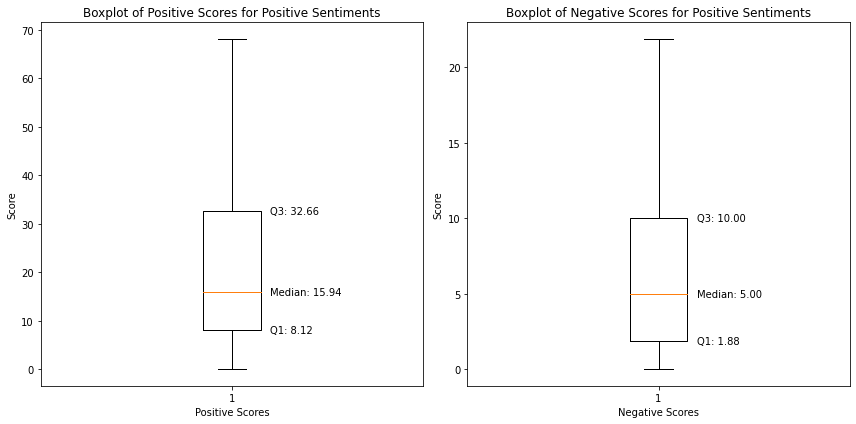

In [80]:
from matplotlib import pyplot as plt

def makeBoxPlots(input, title):

    pos_scores = [i for i, j in input]
    neg_scores = [j for i, j in input]

    plt.figure(figsize=(12, 6))
    
    # Creating boxplot for positive scores
    plt.subplot(1, 2, 1)
    bp_pos = plt.boxplot(pos_scores, showfliers=False)
    plt.title(f'Boxplot of Positive Scores for {title}')
    plt.xlabel('Positive Scores')
    plt.ylabel('Score')
    
    # Calculate quartiles for positive scores
    q1_pos, median_pos, q3_pos = np.percentile(pos_scores, [25, 50, 75])
    
    plt.text(1.1, q1_pos, f'Q1: {q1_pos:.2f}', horizontalalignment='left', verticalalignment='center', fontsize=10)
    plt.text(1.1, median_pos, f'Median: {median_pos:.2f}', horizontalalignment='left', verticalalignment='center', fontsize=10)
    plt.text(1.1, q3_pos, f'Q3: {q3_pos:.2f}', horizontalalignment='left', verticalalignment='center', fontsize=10)
    
    # Creating boxplot for negative scores
    plt.subplot(1, 2, 2)
    bp_neg = plt.boxplot(neg_scores, showfliers=False)
    plt.title(f'Boxplot of Negative Scores for {title}')
    plt.xlabel('Negative Scores')
    plt.ylabel('Score')
    
    # Calculate quartiles for negative scores
    q1_neg, median_neg, q3_neg = np.percentile(neg_scores, [25, 50, 75])
    
    plt.text(1.1, q1_neg, f'Q1: {q1_neg:.2f}', horizontalalignment='left', verticalalignment='center', fontsize=10)
    plt.text(1.1, median_neg, f'Median: {median_neg:.2f}', horizontalalignment='left', verticalalignment='center', fontsize=10)
    plt.text(1.1, q3_neg, f'Q3: {q3_neg:.2f}', horizontalalignment='left', verticalalignment='center', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

makeBoxPlots(zero_list, "Negative Sentiments")
makeBoxPlots(one_list, "Positive Sentiments")

Overall Sentiment: 0.41394334072355854


C:\Users\mwver\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


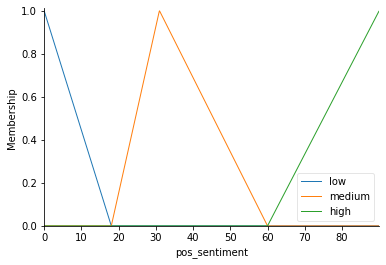

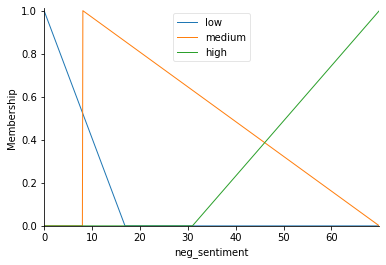

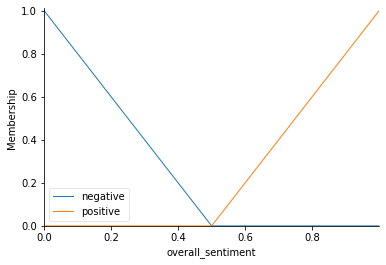

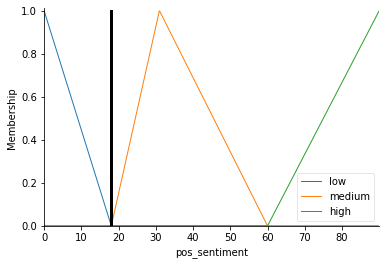

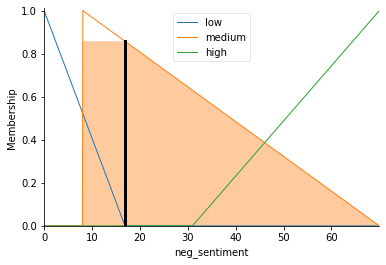

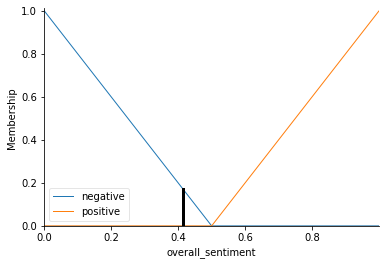

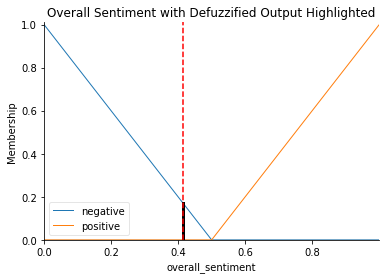

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define linguistic variables
pos_sentiment = ctrl.Antecedent(np.arange(0, 90, 0.1), 'pos_sentiment') 
neg_sentiment = ctrl.Antecedent(np.arange(0, 70, 0.1), 'neg_sentiment')  
overall_sentiment = ctrl.Consequent(np.arange(0, 1, 0.001), 'overall_sentiment')

# Define membership functions for positive sentiment
pos_sentiment['low'] = fuzz.trimf(pos_sentiment.universe, [0, 0, 18.05])
pos_sentiment['medium'] = fuzz.trimf(pos_sentiment.universe, [18.05, 30.97, 60])
pos_sentiment['high'] = fuzz.trimf(pos_sentiment.universe, [60, 90, 90])
##pos_sentiment['low'] = fuzz.trimf(pos_sentiment.universe, [0, 0, 8.12]) 
##pos_sentiment['medium'] = fuzz.trimf(pos_sentiment.universe, [8.12, 16.25, 35.88]) 
##pos_sentiment['high'] = fuzz.trimf(pos_sentiment.universe, [16.25, 35.88, 250])  

# Define membership functions for negative sentiment
neg_sentiment['low'] = fuzz.trimf(neg_sentiment.universe, [0, 0, 16.88])## 
neg_sentiment['medium'] = fuzz.trimf(neg_sentiment.universe, [8.08, 8.08, 70])
neg_sentiment['high'] = fuzz.trimf(neg_sentiment.universe, [30.97, 70, 70])
#neg_sentiment['low'] = fuzz.trimf(neg_sentiment.universe, [0, 0, 5])  
#neg_sentiment['medium'] = fuzz.trimf(neg_sentiment.universe, [5, 10.83, 21.88])  
#neg_sentiment['high'] = fuzz.trimf(neg_sentiment.universe, [10.83, 21.88, 70]) 

# Define membership functions for overall sentiment
overall_sentiment['negative'] = fuzz.trimf(overall_sentiment.universe, [0, 0, 0.5])
overall_sentiment['positive'] = fuzz.trimf(overall_sentiment.universe, [0.5, 1, 1])

# Define rules
rules = [
    ctrl.Rule(pos_sentiment['low'] & neg_sentiment['low'], overall_sentiment['positive']),
    ctrl.Rule(pos_sentiment['medium'] & neg_sentiment['low'], overall_sentiment['positive']),
    ctrl.Rule(pos_sentiment['high'] & neg_sentiment['low'], overall_sentiment['positive']),
    ctrl.Rule(pos_sentiment['low'] & neg_sentiment['medium'], overall_sentiment['negative']),
    ctrl.Rule(pos_sentiment['medium'] & neg_sentiment['medium'], overall_sentiment['negative']),
    ctrl.Rule(pos_sentiment['high'] & neg_sentiment['medium'], overall_sentiment['positive']),
    ctrl.Rule(pos_sentiment['low'] & neg_sentiment['high'], overall_sentiment['negative']),
    ctrl.Rule(pos_sentiment['medium'] & neg_sentiment['high'], overall_sentiment['negative']),
    ctrl.Rule(pos_sentiment['high'] & neg_sentiment['high'], overall_sentiment['negative'])
]


# Create and simulate fuzzy control system
sentiment_ctrl = ctrl.ControlSystem(rules)
sentiment_sim = ctrl.ControlSystemSimulation(sentiment_ctrl)

sentiment_sim.input['pos_sentiment'] = 18.05
sentiment_sim.input['neg_sentiment'] = 16.88

sentiment_sim.compute()
print("Overall Sentiment:", sentiment_sim.output['overall_sentiment'])

pos_sentiment.view()
neg_sentiment.view()
overall_sentiment.view()
plt.show()

# Visualize the activated membership functions
pos_sentiment.view(sim=sentiment_sim)
neg_sentiment.view(sim=sentiment_sim)
overall_sentiment.view(sim=sentiment_sim)

# Show the defuzzified output on the overall sentiment plot
overall_sentiment.view(sim=sentiment_sim)

# Highlight the defuzzified result on the plot
plt.axvline(x=sentiment_sim.output['overall_sentiment'], color='r', linestyle='--')
plt.title('Overall Sentiment with Defuzzified Output Highlighted')
plt.show()


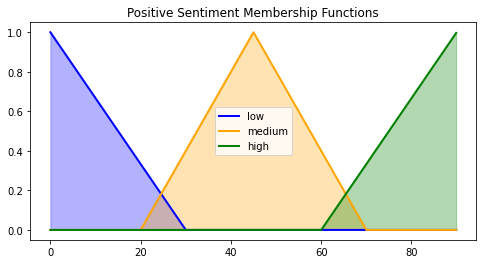

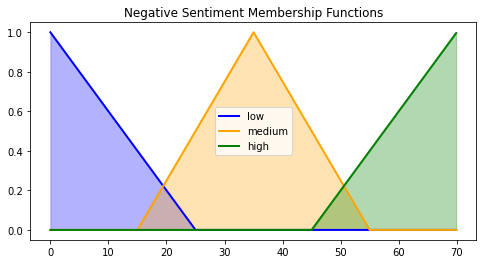

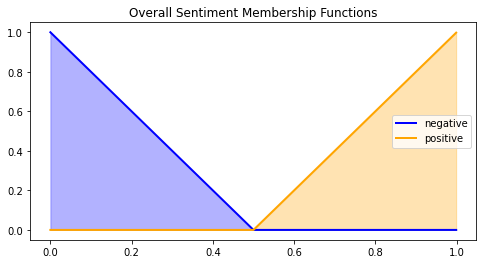

In [115]:
import matplotlib.pyplot as plt

def plot_fuzzy_variable(variable, title, scenarios=None):
    fig, ax = plt.subplots(figsize=(8, 4))
    colors = ['blue', 'orange', 'green']
    labels = variable.terms.keys()
    for color, label in zip(colors, labels):
        membership_function = variable[label].mf
        ax.plot(variable.universe, membership_function, linewidth=2, label=label, color=color)
        ax.fill_between(variable.universe, 0, membership_function, color=color, alpha=0.3)
    
    if scenarios:
        for scenario, scenario_label in scenarios:
            ax.axvline(x=scenario, color='black', linestyle='--', linewidth=2)
            ax.text(scenario, 1.05, scenario_label, ha='center', va='center', fontsize=9, backgroundcolor='white')

    ax.set_title(title)
    ax.set_ylim(-0.05, 1.05)
    ax.legend()
    plt.show()


plot_fuzzy_variable(pos_sentiment, 'Positive Sentiment Membership Functions')
plot_fuzzy_variable(neg_sentiment, 'Negative Sentiment Membership Functions')
plot_fuzzy_variable(overall_sentiment, 'Overall Sentiment Membership Functions')



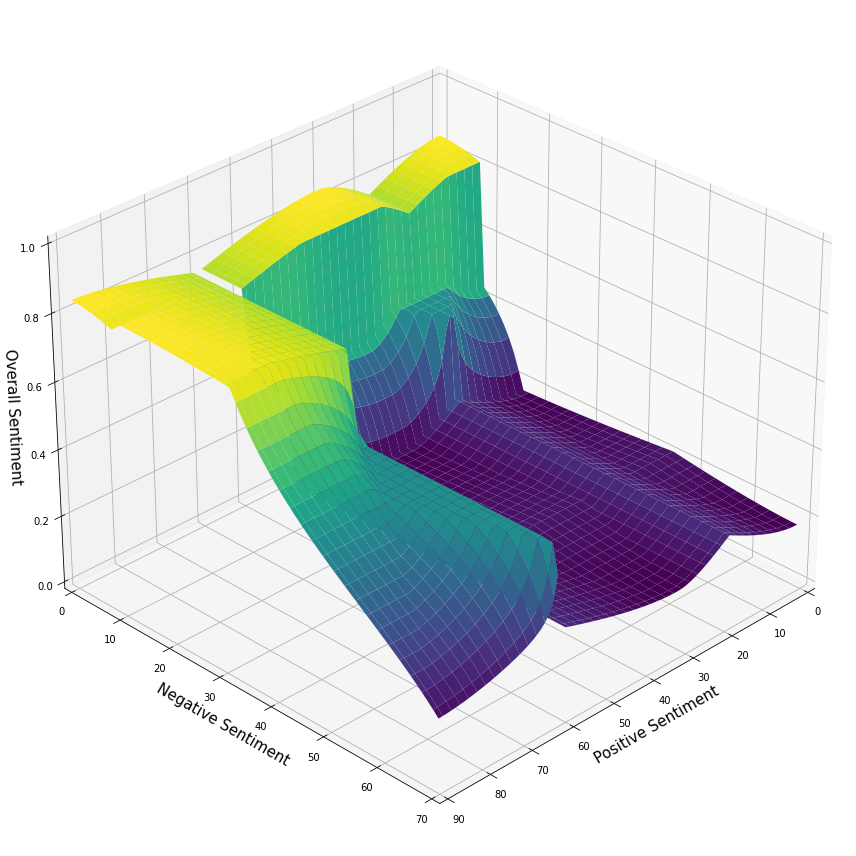

In [126]:
# Function to create and visualize the 3D control surface
def create_surface_plot():
    # Create a grid of pos_sentiment and neg_sentiment values
    x, y = np.meshgrid(np.arange(0, 90, 1), np.arange(0, 70, 1))
    z = np.zeros_like(x, dtype=float)

    # Evaluate the fuzzy system for each pair of input values
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            sentiment_sim.input['pos_sentiment'] = x[i, j]
            sentiment_sim.input['neg_sentiment'] = y[i, j]
            try:
                sentiment_sim.compute()
                z[i, j] = sentiment_sim.output['overall_sentiment']
            except ValueError:
                z[i, j] = np.nan  # Handle cases where output cannot be calculated

    # Plot the surface
    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

    ax.set_xlabel('Positive Sentiment')
    ax.set_ylabel('Negative Sentiment')
    ax.set_zlabel('Overall Sentiment')
    ax.view_init(elev=30, azim=45)
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.zaxis.label.set_size(15)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlim(0, 90)
    ax.set_ylim(0, 70)
    ax.set_zlim(0, 1)

    # Adjust plot layout to prevent overlapping text
    fig.tight_layout()
    plt.show()

create_surface_plot()


In [83]:
# Test on data
def compute_overall_sentiment(row):
    sentiment_sim.input['pos_sentiment'] = row['Positive_Sentiment']
    sentiment_sim.input['neg_sentiment'] = row['Negative_Sentiment']
    
    sentiment_sim.compute()
    
    # Get defuzzified sentiment
    overall_sentiment = sentiment_sim.output['overall_sentiment']
    return int(round(overall_sentiment))

y_pred = []
y_actuals = train_data["Sentiment"]

for index, row in train_data.iterrows():
    pos_score, neg_score = get_sentence_sentiment(row["Review"])
    sentiment_sim.input['pos_sentiment'] = pos_score
    sentiment_sim.input['neg_sentiment'] = neg_score
    sentiment_sim.compute()
    output_sentiment_score = sentiment_sim.output['overall_sentiment']
    y_pred.append(int(round(output_sentiment_score)))


[[247 185]
 [115 303]] 

Mean Absolute Error:  0.35294117647058826
Mean Squared Error:  0.35294117647058826
Root Mean Squared Error:  0.5940885257860046 

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       432
           1       0.62      0.72      0.67       418

    accuracy                           0.65       850
   macro avg       0.65      0.65      0.65       850
weighted avg       0.65      0.65      0.65       850

Accuracy:  0.6470588235294118


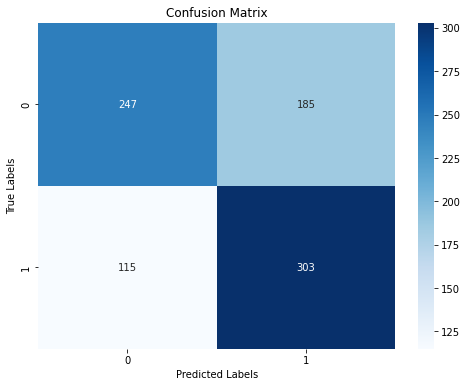

In [84]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn import metrics

conf_matrix = confusion_matrix(y_actuals, y_pred)
print(confusion_matrix(y_actuals, y_pred), "\n")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_actuals, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_actuals, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_actuals, y_pred)), "\n")

print(classification_report(y_actuals, y_pred))
print("Accuracy: ", accuracy_score(y_actuals, y_pred))

import seaborn as sns
labels = ["Negative", "Positive"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [85]:
# Test on testing data
def compute_overall_sentiment(row):
    sentiment_sim.input['pos_sentiment'] = row['Positive_Sentiment']
    sentiment_sim.input['neg_sentiment'] = row['Negative_Sentiment']
    
    sentiment_sim.compute()
    
    # Get defuzzified sentiment
    overall_sentiment = sentiment_sim.output['overall_sentiment']
    return int(round(overall_sentiment))

y_pred = []
y_actuals = test_data["Sentiment"]

for index, row in test_data.iterrows():
    pos_score, neg_score = get_sentence_sentiment(row["Review"])
    sentiment_sim.input['pos_sentiment'] = pos_score
    sentiment_sim.input['neg_sentiment'] = neg_score
    sentiment_sim.compute()
    output_sentiment_score = sentiment_sim.output['overall_sentiment']
    y_pred.append(int(round(output_sentiment_score)))

[[41 27]
 [20 62]] 

Mean Absolute Error:  0.31333333333333335
Mean Squared Error:  0.31333333333333335
Root Mean Squared Error:  0.5597618541248889 

              precision    recall  f1-score   support

           0       0.67      0.60      0.64        68
           1       0.70      0.76      0.73        82

    accuracy                           0.69       150
   macro avg       0.68      0.68      0.68       150
weighted avg       0.69      0.69      0.68       150

Accuracy:  0.6866666666666666


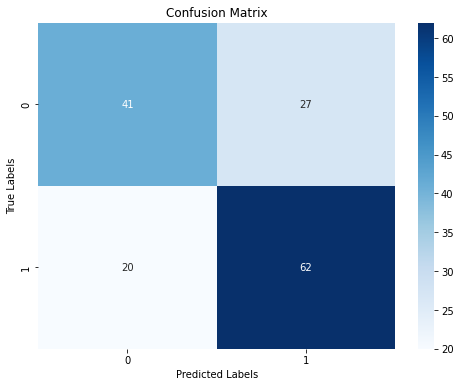

In [86]:
conf_matrix = confusion_matrix(y_actuals, y_pred)
print(confusion_matrix(y_actuals, y_pred), "\n")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_actuals, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_actuals, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_actuals, y_pred)), "\n")

print(classification_report(y_actuals, y_pred))
print("Accuracy: ", accuracy_score(y_actuals, y_pred))

import seaborn as sns
labels = ["Negative", "Positive"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [87]:
# Test on unseen data
# Load dataset
file_path = r"C:\Users\mwver\Documents\Uni Projects\MENG\Advanced AI\Assignment 2\prepared_data2.csv"
data2 = pd.read_csv(file_path)
data2.head(5)

,Review,Sentiment
0,no way plug converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor pro...,0
4,mic great,1


In [88]:
y_pred = []
y_actuals = data2["Sentiment"]

for index, row in data.iterrows():
    pos_score, neg_score = get_sentence_sentiment(row["Review"])
    sentiment_sim.input['pos_sentiment'] = pos_score
    sentiment_sim.input['neg_sentiment'] = neg_score
    sentiment_sim.compute()
    output_sentiment_score = sentiment_sim.output['overall_sentiment']
    y_pred.append(int(round(output_sentiment_score)))

[[204 296]
 [219 281]] 

Mean Absolute Error:  0.515
Mean Squared Error:  0.515
Root Mean Squared Error:  0.7176350047203662 

              precision    recall  f1-score   support

           0       0.48      0.41      0.44       500
           1       0.49      0.56      0.52       500

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000

Accuracy:  0.485


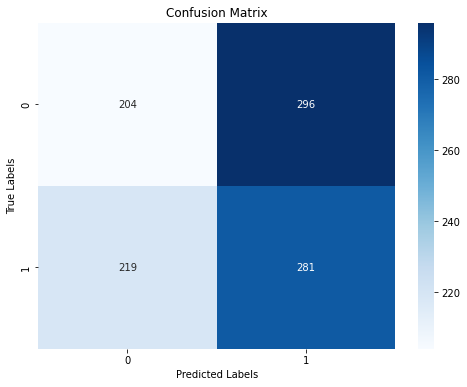

In [89]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn import metrics

conf_matrix = confusion_matrix(y_actuals, y_pred)
print(confusion_matrix(y_actuals, y_pred), "\n")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_actuals, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_actuals, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_actuals, y_pred)), "\n")

print(classification_report(y_actuals, y_pred))
print("Accuracy: ", accuracy_score(y_actuals, y_pred))

import seaborn as sns
labels = ["Negative", "Positive"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [129]:
train_data.head()

,Review,Sentiment
150,fiancé come middle day greet seat right away,1
151,great restaurant mandalay bay,1
152,wait minute vain,0
153,crostini come salad stale,0
154,highlight great quality nigiri,1


In [130]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# Bag of Words Representation
tv=TfidfVectorizer()

data["Review"] = data["Review"].fillna("")
tv_data = tv.fit_transform(data["Review"])
print(tv_data.shape)
print(tv.get_feature_names_out())

(1000, 1569)
['absolute' 'absolutely' 'absolutley' ... 'yum' 'yummy' 'zero']


In [132]:
x_train = tv_data[:850]
x_test = tv_data[850:]
y_train = data["Sentiment"][:850]
y_test = data["Sentiment"][850:]

In [133]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, hidden_layer_sizes=10, learning_rate_init=0.01, activation="tanh")

mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), "\n")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)), "\n")

print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

[[88 32]
 [ 7 23]] 

Mean Absolute Error:  0.26
Mean Squared Error:  0.26
Root Mean Squared Error:  0.5099019513592785 

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       120
           1       0.42      0.77      0.54        30

    accuracy                           0.74       150
   macro avg       0.67      0.75      0.68       150
weighted avg       0.82      0.74      0.76       150

Accuracy:  0.74


In [137]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train.toarray(), y_train)
y_pred = gnb.predict(x_test.toarray())

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), "\n")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)), "\n")

print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

[[94 26]
 [17 13]] 

Mean Absolute Error:  0.2866666666666667
Mean Squared Error:  0.2866666666666667
Root Mean Squared Error:  0.5354126134736337 

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       120
           1       0.33      0.43      0.38        30

    accuracy                           0.71       150
   macro avg       0.59      0.61      0.60       150
weighted avg       0.74      0.71      0.73       150

Accuracy:  0.7133333333333334
